In [150]:
print(1)

1


In [ ]:
# 역슬래시 \ 안됨..

In [151]:
import pandas as pd
score = pd.read_csv('score.csv')
# print(score.info())
# print(score.head())
kor = score.kor
eng = score['eng']
mat = score['mat']
dept = score['dept']

from statistics import mean
print(max(kor))
print(min(kor))
print( round(mean(kor),1) )     #반올림

dep_cnt = {}                    #dict {101: 5, 102: 5, 103: 5}
for k in dept:
    dep_cnt[k] = dep_cnt.get(k, 0)+1     
print(dep_cnt)

95
40
71.4
{101: 5, 102: 5, 103: 5}


In [152]:
samkospi = pd.read_excel('sam_kospi.xlsx')
# print(score.info())
# print(score.head())

highK=samkospi.High               
LowK=samkospi['Low']
print(max(highK))
print(min(LowK))
print(round(mean(highK),1))          #statistics꺼     #highK.mean() - pandas꺼



1510000
1033000
1307947.4


In [153]:
import urllib.request                         #원격서버 파일요청
from bs4 import BeautifulSoup                #python -m pip install 패키지이름
url = 'http://www.naver.com/index.html'
res = urllib.request.urlopen(url)
data = res.read().decode('utf-8')             #encoding설정 변경
#print(navHtml)
navHtml = BeautifulSoup(data, 'html.parser')
#print(navHtml)

aa = navHtml.find('a')
print(aa)

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


In [154]:
html01f = open('html01.html','r',encoding='utf-8')

#print(html01f.read())
bshtml01 = BeautifulSoup(html01f, 'html.parser')
bsh1 = bshtml01.find('h1')                     #특정tag 불러오기 방식1
bsh2 = bshtml01.html.body.h2                   #특정tag 불러오기 방식2
#print(bsh1.string)                            #태그중 innerText만 가져오기

lis = bshtml01.find_all('li')                  #특정tag 불러오기 방식3 여러개일때
for li in lis:
    print(li.string)


 header : 문서의 머리말(사이트 소개, 제목, 로그 )
 nav : 네이게이션(메뉴) 
 section : 웹 문서를 장(chapter)으로 볼 때 절을 구분하는 태그
 aside : 문서의 보조 내용(광고, 즐겨찾기, 링크) 
 footer : 문서의 꼬리말(작성자, 저작권, 개인정보보호) 


In [155]:
html02f = open('html02.html','r',encoding='utf-8').read()

bshtml02 = BeautifulSoup( html02f, 'html.parser' )
bs2Links = bshtml02.find_all('a')
for lik in bs2Links:
    print(lik.string)


네이버
네이버
네이버 새창으로
다음
다음


In [156]:
html03f = open('html03.html','r',encoding='utf-8').read()

bshtml03 = BeautifulSoup(html03f, 'html.parser')
table = bshtml03.select_one('#tab')
trs = bshtml03.select_one('#tab>tr')                 #1행
th = bshtml03.select_one('#tab>tr>th')               

thodd = bshtml03.select('#tab>.odd')                # odd 클라스의 td만 뽑기
for th in thodd:
    thds = th.find_all('td')
    for td in thds:
        print(td.string)
    

 201602 
 이순신 
 해양학과 
 lee@naver.com 
 201604 
 유관순 
 유아교육 
 you@naver.com 


In [157]:
import urllib.request as req
url1='http://media.daum.net'
url2='http://news.naver.com'

            #1.Daum
res11 = req.urlopen(url1).read()
res1 = res11.decode('utf-8')
bsRes = BeautifulSoup(res1, 'html.parser')           #bs parse
#타이틀만 뽑기
atags = bsRes.select('a[class=link_txt]')            #a tags만....
titles=[]
for title in atags:
    titles.append( title.string.strip() )             #strip() == trim과 같음

#뽑은 타이틀 파일로 저장01
res1file = open('E:/PowerBI/Jiyeong/workspace/20230401/day5/Daum.txt',mode='w', encoding='utf-8') 
res1file.write(str(titles))                           # 타이틀만 저장한다
res1file.close()


#[ 텍스트 전처리 ]
import re
def clean_Text(txt):
    cleaned = re.sub('[,.?!:;\"\']','', txt)              #1.문장부호 제거
    cleaned = re.sub('[!@#$%^&*()]|[0-9]','', cleaned)     #2.특문,숫자 제거
    cleaned = re.sub('[a-z]|[A-Z]','', cleaned.lower())    #3.or 영어 lower() -> 영문 제거
    cleaned = ' '.join(cleaned.split())     #4. 공백 제거

    return cleaned
    #print(cleaned)
    
cleaned_afterDef=[]    
for tt in titles:
    cleaned_afterDef.append(clean_Text(tt))
    
    word_dict={}
    for cdef in cleaned_afterDef:
        for j in cdef.split():
            word_dict[j] = word_dict.get(j, 0)+1
            print(j)    


FileNotFoundError: [Errno 2] No such file or directory: 'E:/PowerBI/Jiyeong/workspace/20230401/day5/Daum.txt'

In [158]:
# 뽑은 타이틀 파일로 저장02: 모듈 pickle - 바이너리로 읽고 쓰기.   mode = 'wb | rb',  dump(), load()
import pickle
resPCkfile = open('E:/PowerBI/Jiyeong/workspace/20230401/day5/Daum.pickle',mode='wb') 
pickle.dump( titles , resPCkfile )
readPCKfile = open('E:/PowerBI/Jiyeong/workspace/20230401/day5/Daum.pickle',mode='rb') 
pickle.load( readPCKfile )


FileNotFoundError: [Errno 2] No such file or directory: 'E:/PowerBI/Jiyeong/workspace/20230401/day5/Daum.pickle'

In [159]:
        # 2.Naver
res22 = req.urlopen(url2).read()
res2 = res22.decode('utf-8')
bsRes2 = BeautifulSoup(res2, 'html.parser')           #bs parse
#타이틀만 뽑기

atags2 = bsRes2.select('div.cjs_t')                  #제목인 class만....


titles2=[]
for title in atags2:
    titles2.append( title.string.strip() )             #strip() == trim과 같음
    
print(titles2)    

#뽑은 타이틀 파일로 저장01
res1file = open('E:/PowerBI/Jiyeong/workspace/20230401/day5/Naver.txt',mode='w', encoding='utf-8') 
res1file.write(str(titles))                           # 타이틀만 저장한다
res1file.close()


#[ 텍스트 전처리 ]
import re
def clean_Text(txt):
    cleaned = re.sub('[,.?!:;\"\']','', txt)              #1.문장부호 제거
    cleaned = re.sub('[!@#$%^&*()]|[0-9]','', cleaned)     #2.특문,숫자 제거
    cleaned = re.sub('[a-z]|[A-Z]','', cleaned.lower())    #3.or 영어 lower() -> 영문 제거
    cleaned = ' '.join(cleaned.split())     #4. 공백 제거

    return cleaned
    #print(cleaned)
    
cleaned_afterDef2=[] 
word_dict={}
# for tt in titles2:
#     cleaned_afterDef2.append(clean_Text(tt))
    
    
#     for cdef2 in cleaned_afterDef2:
#         for j in cdef2.split():
#             word_dict[j] = word_dict.get(j, 0)+1
  



['‘맥북 두뇌’ 애플 자체 CPU 시작점…독일 양조장과 맥주정원 사이', '세월호 참사 9주기 추모 행사 이어져...진도 팽목항', '행보 넓힌 김건희 여사..대통령실, "야당 가짜뉴스 개탄"', '[속보]중국발 황사 서울·대구·춘천·울산·전북·충남 등 관측…내일 오후부터 미세먼지 해소', '[WHY] Oh, the lengths Koreans will go, to make themselves taller!', "봄철 대정전 우려는 오로지 '태양광' 탓일까", 'MBC 전 경영진 "검찰의 무리한 기소… 승복 못 해"', "경호원보다 빠르다… 日총리 테러범 목덜미 낚은 '빨간 옷의 어부'", '전여옥, 민주 ‘돈 봉투’에 文 직격…“나라 ‘개판’ 만들고 기르던 개 팔아버려”', '“소주 광고에 男모델이?”...한소희, 아이유 사이에 이도현 등장한 까닭 [이코노Y]', "'아내 사망에 불만 품고…' 응급실 의사에게 흉기 휘두른 70대", '4·16 가족극단 노란리본 “슬픈 모습만 보여주긴 싫어요”', 'LG전자 사장이 말한 임원 비법 “상사 3명 진급시키고, 따르는 후배 5명 둬라”', '한국인의 명품 ‘짝사랑’...루이비통, 한국서 1조7000억 벌었는데 기부금은 ‘0’', '이근 따라 우크라 갔다 벌금 300만원…"참전 안해"', '중국어선 쫓던 북한경비정 NLL 침범…해군 "대응 과정서 부상자 발생"', '직업인으로서의 자존감을 무너뜨리는 성희롱 [세상에 이런 법이]', '[제주Zoom] "니가 거기서 왜 나와?" 멕시코 자생 선인장 제주에  떡하니', '이젠 싱싱한 채소도 사치?…냉동채소·과일 찾는다', '김태효 "美서 만날 때마다 유감표명"…한미정보동맹 \'日포함\' 가능성', "그냥 낡은 의자인 줄…SNS에 올리자 누리꾼 '깜짝'", '中 어선 쫓던 北 경비정 NLL 침범…해군 경고사격에 돌아가', '“갤럭시S23 반값” 이통3사, 공시지원금 대폭 확대', '7개월 아기 철봉에 매단 피트니스 코치, 학대 아니라는데…', '“역시 한국 대통령은 고생이 

FileNotFoundError: [Errno 2] No such file or directory: 'E:/PowerBI/Jiyeong/workspace/20230401/day5/Naver.txt'

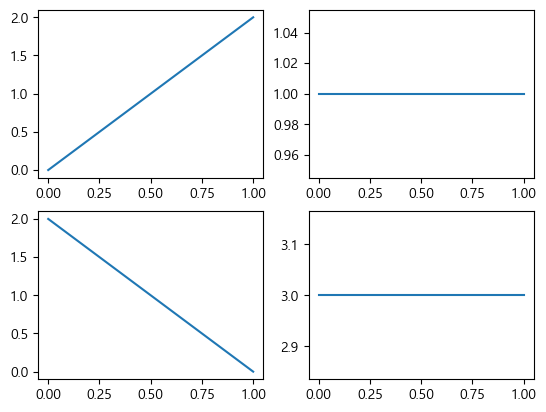

In [3]:
# 그래프 그리기
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()  #한글지원 
rc('font', family = font_name )

    # 방식1
figure = plt.figure()
axes1=figure.add_subplot(221)                       #2*2 1번째 ~ 4번쨰까지
axes2=figure.add_subplot(222)                        
axes3=figure.add_subplot(223)
axes4=figure.add_subplot(224)


axes1.plot( [0,2] )                                   #0에서 2까지
axes2.plot( [1,1] )
axes3.plot( [2,0] )
axes4.plot( [3,3] )
plt.show()                                           # for파이참 또는 불필요메시지 삭제


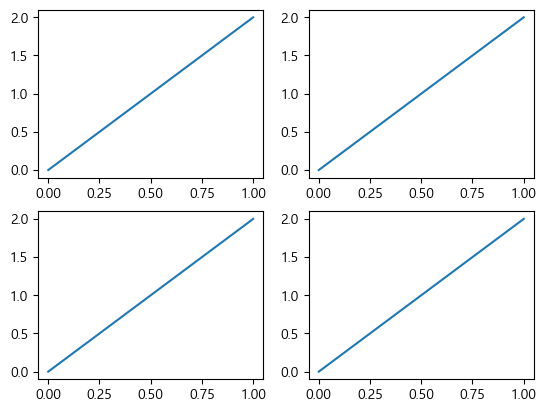

In [161]:
        # 방식2 ( 축약형 )
figure,axes = plt.subplots(2,2)
axes[0][0].plot([0,2])
axes[0][1].plot([0,2])
axes[1][0].plot([0,2])
axes[1][1].plot([0,2])
plt.show()

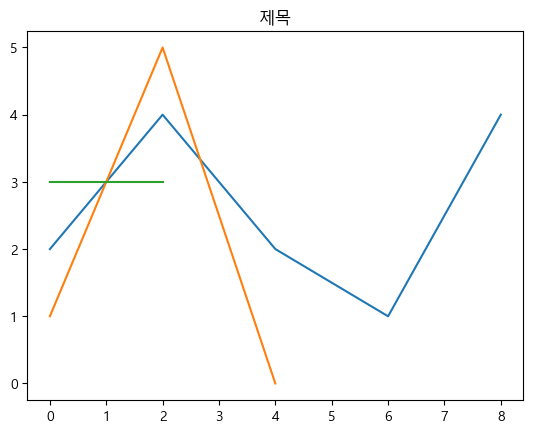

In [162]:
        # 꺽은선
figure,axes = plt.subplots(1,1)

x=[0,2,4,6,8]
y=[2,4,2,1,4]
axes.plot(x,y)                               # 변수방식
axes.plot([0,2,4],[1,5,0])                   # 바로 넣는 방식
axes.plot([3,3,3])                           # x생략시, 0부터 1씩 증가
plt.title('제목')                            # 타이틀
plt.show()


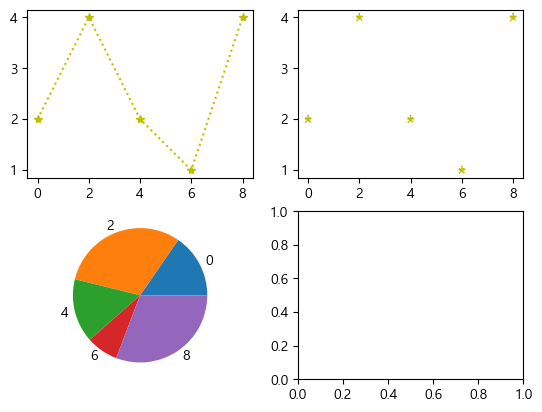

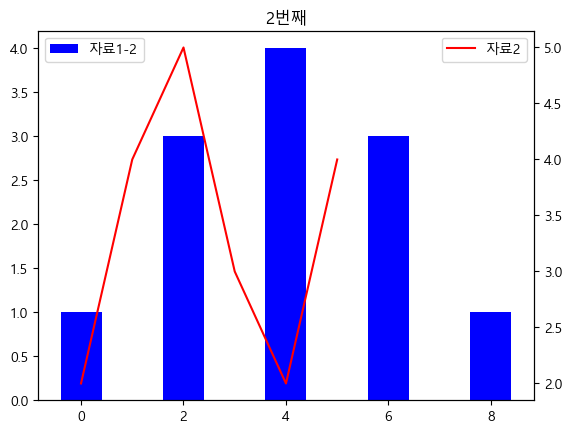

In [10]:
    # [스타일]
    # 선: solid, dotted, dahsdotted, dashed
    # colour: r, b, g, y 
    # marker: *, ^ 등등

    
figure,axes = plt.subplots(2,2)

x=[0,2,4,6,8]
y=[2,4,2,1,4]
axes[0][0].plot(x,y, color='y', marker='*', linestyle='dotted', label='data1-1')      # 스타일,라벨(범례)     
axes[0][1].scatter(x,y, color='y', marker='*', linestyle='dotted', label='data1-1')   # 점그래프: scatter()
axes[1][0].pie(y, labels=x)                       # 파이 그래프 with 라벨


figure,axes = plt.subplots(1,1)
plt.title('2번째') 
y1=[1,3,4,3,1]    
axes.bar(x,y1, color='b', label='자료1-2')                       # 막대그래프 with 스타일
axes.legend(loc=2)                                               # 라벨(범례) 위치(1~4: 우상->좌상 순)

    
axes2 = axes.twinx()                                              # twinx() 새 범주를 추가할때(오른쪽)
x3=[0,1,2,3,4,5]
y3=[2,4,5,3,2,4]
axes2.plot(x3, y3, color='r', label='자료2')                       # 라벨
axes2.legend(loc=1)                                                # 라벨



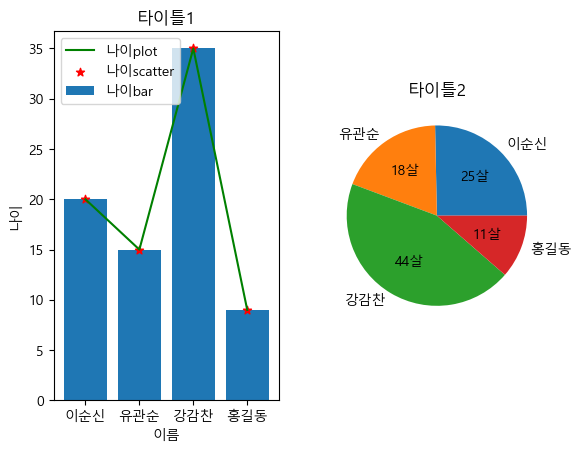

In [164]:
figure = plt.figure()                                 # 방식1
axX = ['이순신','유관순','강감찬','홍길동']
axV = [20, 15, 35, 9]
axes5=figure.add_subplot(121)
axes5.plot(axX, axV, color='g', label='나이plot')     # 그래프
axes5.bar(axX, axV, label='나이bar')                  # bar
axes5.scatter(axX, axV, color='r', marker='*', label='나이scatter') # 점
axes5.legend(loc=2)
plt.title('타이틀1') 
plt.xlabel('이름')                                     # x,y축 표시 라벨 
plt.ylabel('나이')

axes6=figure.add_subplot(122)
axes6.pie(axV, labels = axX, autopct='%d살')                  #파이(원), 값표시: autopct
plt.title('타이틀2') 

plt.show()

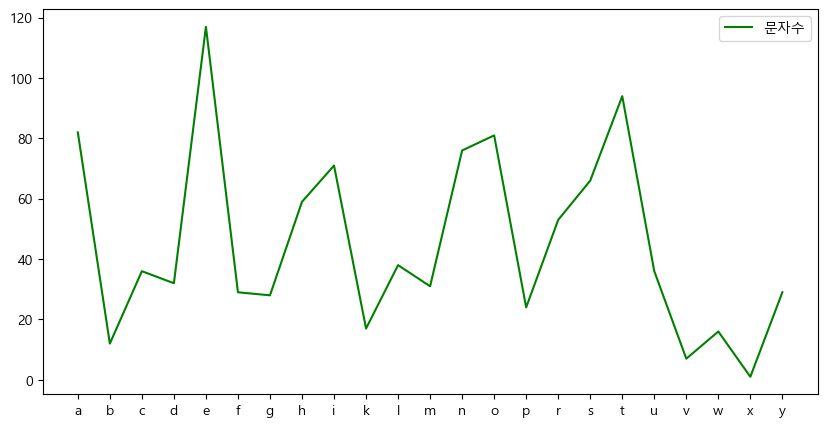

In [165]:
words_file = open('E:/PowerBI/Jiyeong/workspace/20230401\day5_6/txt01_data.txt','r',encoding='utf-8')  # txt01_data 파일 가져옴
words01 =  words_file.read()

words_file.close()

import re
def clean_Text(txt):
    cleaned = re.sub('[,.?:;\"\']','', txt)                  #1.문장부호 제거
    cleaned = re.sub('[!@#$%^&*\(\)-]|[0-9]','', cleaned)     #2.특문,숫자 제거
    cleaned = re.sub('[가-힣]','', cleaned)      #3.or 영어 lower() -> 영문 제거
    cleaned = ' '.join(cleaned.split())                      #4. 공백 제거

    return cleaned
    #print(cleaned)

cleaned_chars = [clean_Text(i) for i in words01]            #함수결과를 배열에 저장
chars01_dict = {}                                           
for w in cleaned_chars:
    for j in w.split():
        chars01_dict[j] = chars01_dict.get(j,0)+1              #위 결과를 dict에 저장

chars01_dict = dict(sorted(chars01_dict.items()))              # key값 기준 정렬


chars = [] 
cnts = []
for i in chars01_dict.keys():                                # 다시 key, value 로 나눔
    chars.append(i)
for i in chars01_dict.values():
    cnts.append(i)
# print(chars)
# print(cnts)


                                                      # 방식1으로 그래프그리기
figure = plt.figure(figsize=(10,5))                   # 그래프 figsize=(가로,세로)길이
axX = chars                                                                         
axV = cnts
axes6 = figure.add_subplot(111)
axes6.plot(axX, axV, color='g', label='문자수')
axes6.legend(loc=1)
plt.show()


{'a': 82, 'e': 117, 'h': 59, 'i': 71, 'n': 76, 'o': 81, 'r': 53, 's': 66, 't': 94}


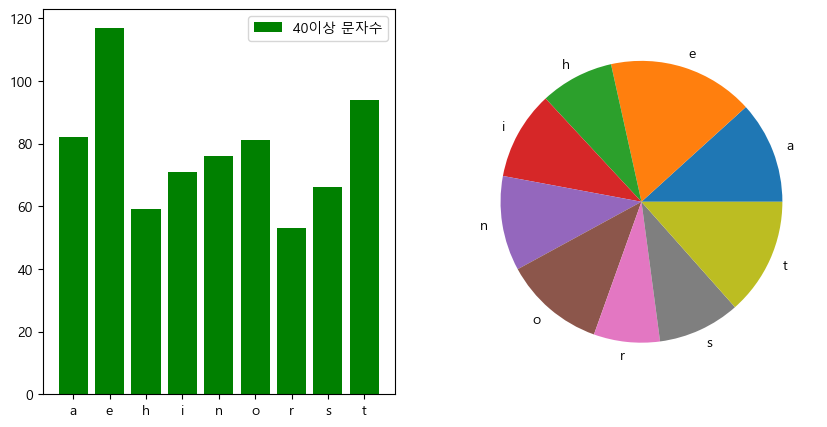

In [166]:
# ~~중에서 40회이상만 
chars01_dict_over40 = {}
for k, v in chars01_dict.items():
    if v >= 40:
        chars01_dict_over40[k] = v                  # == chars01_dict.get(k,v)
print(chars01_dict_over40)


chars = [] 
cnts = []
for i in chars01_dict_over40.keys():                # 다시 key, value 로 나눔
    chars.append(i)
for i in chars01_dict_over40.values():
    cnts.append(i)

                                                      
figure = plt.figure(figsize=(10,5))               
axX = chars                                                                         
axV = cnts
axes6 = figure.add_subplot(121)
axes6.bar(axX, axV, color='g', label='40이상 문자수')
axes6.legend(loc=1)

axes7 = figure.add_subplot(122)
axes7.pie( axV, labels=axX)
plt.show()


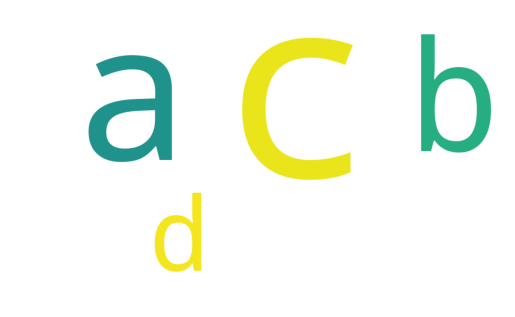

In [169]:
# Word Cloud: 
import wordcloud

wc = wordcloud.WordCloud(width=1000, height=600, background_color="white", random_state=0)
keywords={ 'a':5,'b':3,'c':10,'d':1 }
cloud = wc.generate_from_frequencies(keywords)
plt.figure()
#plt.axis("off")
plt.imshow(cloud)

In [ ]:
# PowerBI
# SQL
Oracle DB: https://www.oracle.com/database/technologies/oracle-database-software-downloads.html
SQL developer: Windows 64-bit with JDK 11 included
    
unzip -> setup -> next*3 -> 
기본설치에서: 'oracle base':~users\oracle, '전역db이름':orcl, 'pw':Aa123456
-> 완료-> cmd관리자권한 -> sqlplus ->  버전 19.3.0 확인 -> 

create user c##sql_study identified by 1234; (c##하면 안됨;)
-> grant dba to c##sql_study
-> connect c##sql_study/1234
기타: conn sys/oracle as sysdba
     grant connect, dba, resource to sql_study; #모든권한 주기
        
-> sql developer 실행 -> sqld_study 새 db만듦
        